## Analysis of Yelp Dataset Portfolio2 

The portfolio aims to use various data processing techniques to clean and preprocess the data, filter out irrelevant data, and remove any outliers that could impact the accuracy of the model. Finally, the portfolio aims to use linear regression models to train and validate the model's accuracy in predicting user ratings towards business. Ultimately, the objective is to build a reliable model that can be used to provide insights into user preferences and help businesses make data-driven decisions to improve their services and offerings. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use Yelp sub-dataset.

### Import the output sample data from Portfolio1
The csv file named `Yelp_Portfolio2_Input.csv` is provided. You may need to use the Pandas method, i.e., `read_csv`, for doing this. After that, please import the csv file and print out its total length.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
sample_data = pd.read_csv('Yelp_Portfolio2_Input.csv')
print(len(sample_data))

38654


In [3]:
sample_data.head()

business_categories business_city             business_id  \
0   Middle Eastern; Restaurants         Tempe  6oRAC4uyJCsJl1X0WZpVSA   
1         Tattoo; Beauty & Spas         Tempe  WGNIYMeXPyoWav1APUq7jA   
2             Tires; Automotive      Glendale  rxQ2PIjhAx6dgAqUalf99Q   
3       Sushi Bars; Restaurants         Tempe  EC9WB-iVjd28B6R6KIZ8TA   
4  Arts & Entertainment; Cinema         Tempe  LDJhwZN14AZOJyHjg2lkRw   

         date  stars                                               text  \
0   14/6/2012      4  love the gyro plate. Rice is so good and I als...   
1  23/12/2011      4  Good tattoo shop. Clean space, multiple artist...   
2    9/9/2012      5  Never having dealt with a Discount Tire in Pho...   
3    4/8/2010      4  Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...   
4  13/12/2011      4  We got passes for the preview of Mission Impos...   

   useful                 user_id  
0       1  0hT2KtfLiobPvh6cDC8JQg  
1       2  Xm8HXE1JHqscXe5BKf0GFQ  
2       0  HLbhD2OyiMCUDRR4c1iXaw  
3       0  jdoGEEy5s-5L1O_lNzEi2g  
4       0  Mb0psF4WQF7gZSuZafVr-g

# Q1. `business_categories` processing

You may notice that there are a total of 693 unique business categories present in the sample data. Please write a code snippet to confirm this number. Then, generate a boxplot of `stars` for `business_categories`.

Total number of unique business categories: 693


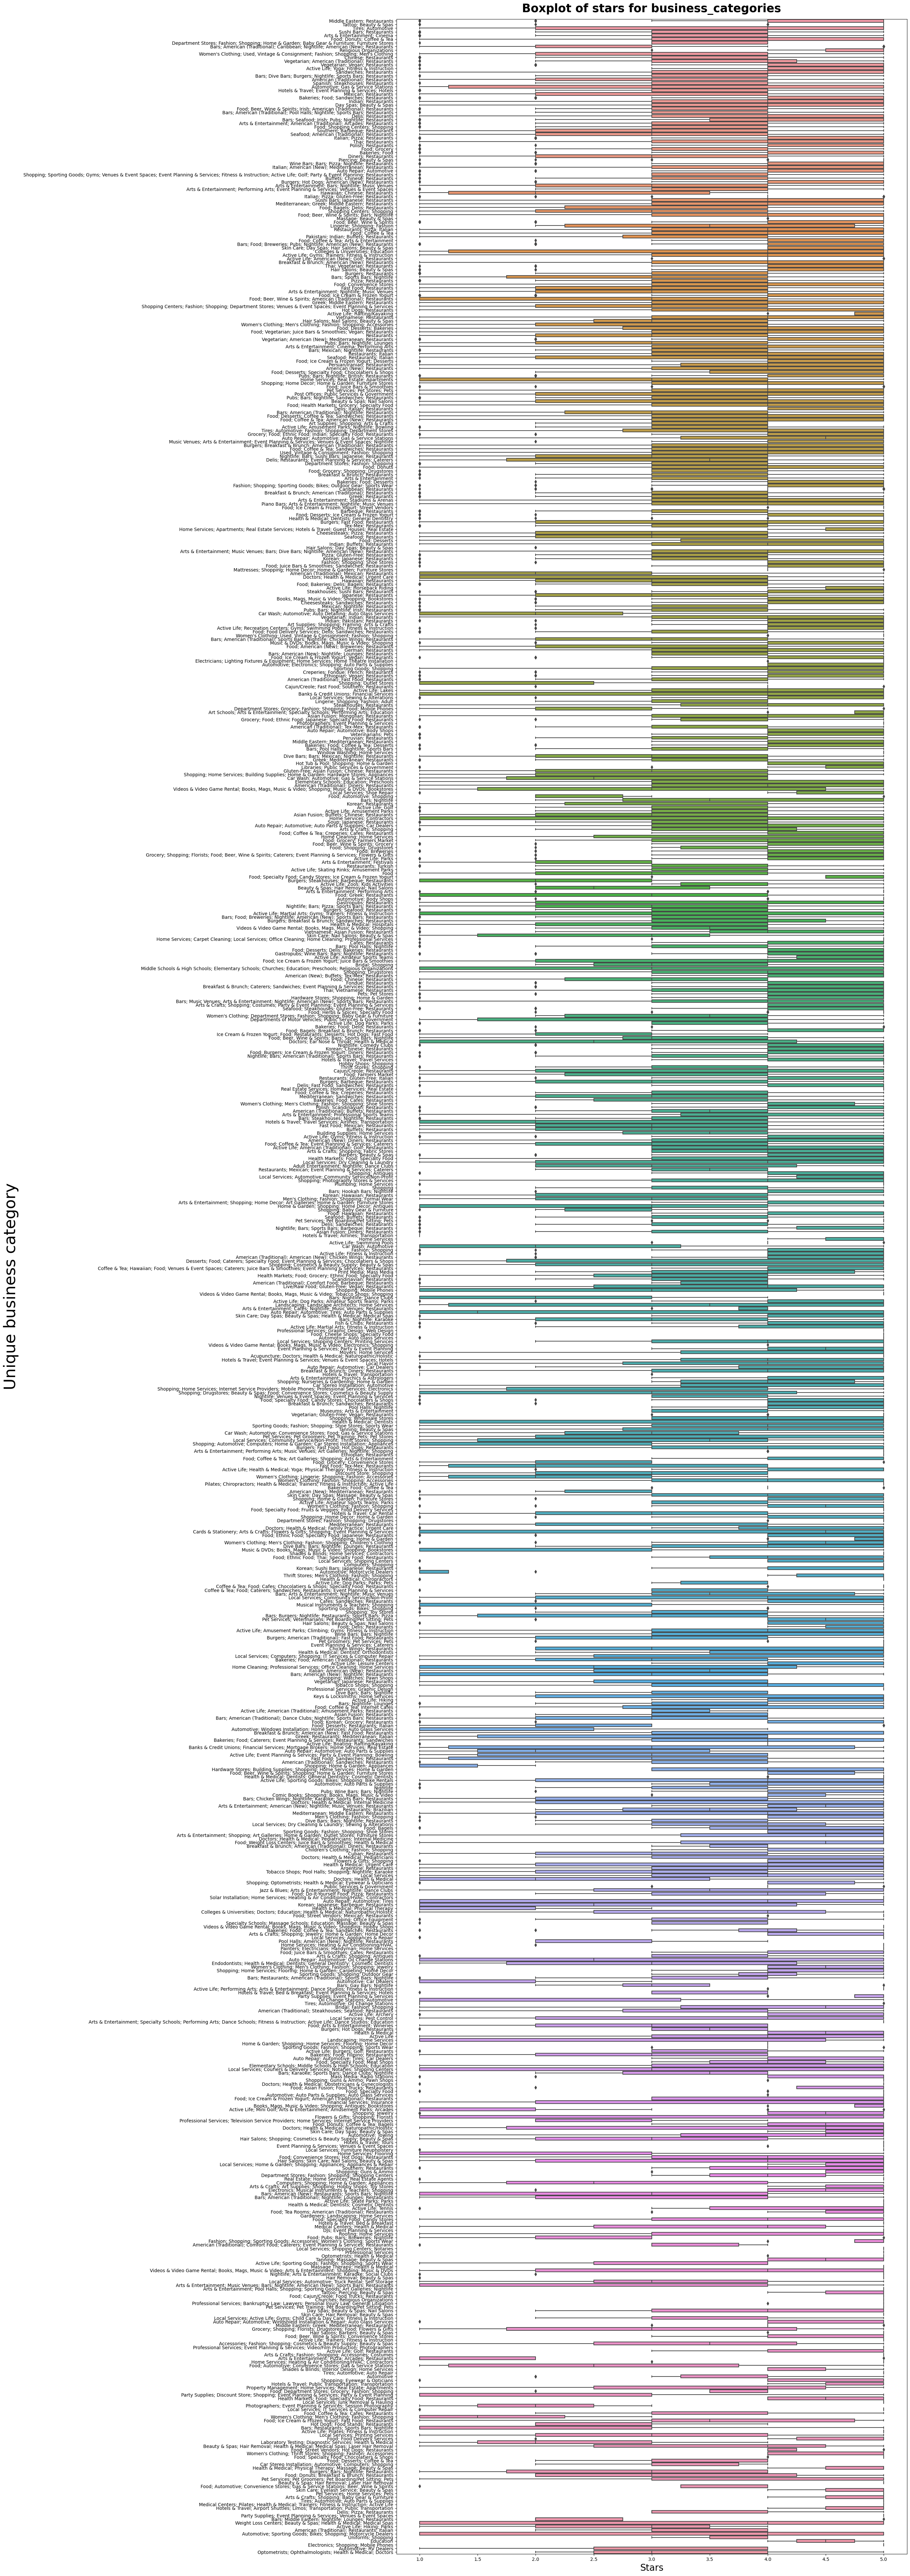

In [4]:
# your code and solutions
print("Total number of unique business categories:", sample_data['business_categories'].nunique())

# Boxplot of 'stars' for 'business_categories'
plt.figure(figsize=(20,100))
sns.boxplot(x='stars', y='business_categories', data=sample_data)
plt.ylabel('Unique business category', size = 35, labelpad = 10)
plt.xlabel('Stars', fontsize = 20)
plt.title("Boxplot of stars for business_categories", size = 25, pad = 15, fontweight = 'bold')
plt.show()

Sometimes we need to extract some major categories, such as `Middle Eastern; Restaurants` and `Sushi Bars; Restaurants`, both of which should belong to the `Restaurants` category.

### Q1.1 How to efficiently and accurately extract the last category value (i.e., categorieN) from the `business_categories` column in a dataset, where the format of each row is a semicolon-separated list of categories (i.e., 'categorie1; categorie2;...;categorieN')? and replace the original string with this last category value. At last, print the first five rows.

In [5]:
# your code and solutions

# Convert the dataframe column 'business_categories' into a list and assign a variable to the list
business_categories_list = sample_data['business_categories'].tolist()

# Using for-loop to loop through each row of the list
# During for-loop, extract each row's last category value and replace the original string with the last value
index = 0
for row in business_categories_list:
    business_categories_list[index] = business_categories_list[index].split()
    business_categories_list[index] = business_categories_list[index][-1]
    index += 1

# Convert the list back to dataframe and update the value of column 'business_categories' of the sample_data
business_categories_df = pd.DataFrame(business_categories_list, columns = ['business_categories'])
sample_data.update(business_categories_df)
sample_data.head()

business_categories business_city             business_id        date  \
0         Restaurants         Tempe  6oRAC4uyJCsJl1X0WZpVSA   14/6/2012   
1                Spas         Tempe  WGNIYMeXPyoWav1APUq7jA  23/12/2011   
2          Automotive      Glendale  rxQ2PIjhAx6dgAqUalf99Q    9/9/2012   
3         Restaurants         Tempe  EC9WB-iVjd28B6R6KIZ8TA    4/8/2010   
4              Cinema         Tempe  LDJhwZN14AZOJyHjg2lkRw  13/12/2011   

   stars                                               text  useful  \
0      4  love the gyro plate. Rice is so good and I als...       1   
1      4  Good tattoo shop. Clean space, multiple artist...       2   
2      5  Never having dealt with a Discount Tire in Pho...       0   
3      4  Cliff notes\n- Cheap: $1-2/plate\n- Fast: It's...       0   
4      4  We got passes for the preview of Mission Impos...       0   

                  user_id  
0  0hT2KtfLiobPvh6cDC8JQg  
1  Xm8HXE1JHqscXe5BKf0GFQ  
2  HLbhD2OyiMCUDRR4c1iXaw  
3  jdoGEEy5s-5L1O_lNzEi2g  
4  Mb0psF4WQF7gZSuZafVr-g

### Q1.2 Let's first check how many unique business categories are present in the dataset (output from Q1.1). Maybe it's still not an appropriate number to make a clear Boxplot. Now, we want to display `ALL Rows` of the business category count data. That is to count and print the number of occurrences for each business category.

In [6]:
# your code and solutions

# Set to display configuration
pd.set_option('display.max_rows', None)

# Display the number of occurrences for each business category
print("Total number of unique business categories:", sample_data['business_categories'].nunique())
categories_count = sample_data.pivot_table(index = ['business_categories'], aggfunc = ['size']).reset_index()
print(categories_count)

Total number of unique business categories: 139
       business_categories   size
0              Accessories     66
1               Activities     10
2                    Adult     11
3                   Agents      7
4              Alterations     40
5                     Ammo      4
6                 Antiques     44
7               Apartments     52
8               Appliances     48
9                  Arcades     17
10                 Archery      4
11                  Arenas    275
12                    Arts    112
13             Astrologers      3
14              Automotive    334
15                  Bagels     29
16                Bakeries     64
17                    Bars     50
18              Bookstores    208
19                 Bowling     37
20               Brazilian      4
21               Breakfast      3
22               Breweries     79
23                   Cafes      6
24                    Care     56
25                Caterers     78
26                 Centers     26


### Q1.3 We want to remove categories that appear fewer than 200 times. Write a Python code snippet to perform this operation. At last, print the number of resulting unique business_categories.

In [7]:
# your code and solutions

# Remove categories that appear fewer than 200 times
categories_count.drop(categories_count[categories_count['size'] < 200].index, inplace = True)
print("The number of resulting unique business_categories:", categories_count['business_categories'].nunique())

The number of resulting unique business_categories: 21


# Q2. Outliers

### Q2.1 Remove any rows from the sample_data DataFrame (output from Q1.3) where the `useful` column has a value of 6 or more; Then, create a single figure with two subplots, one showing the boxplot of `useful` column of the original data and the other showing the boxplot of the data with outliers removed. 

At last, __print the length of the data__.

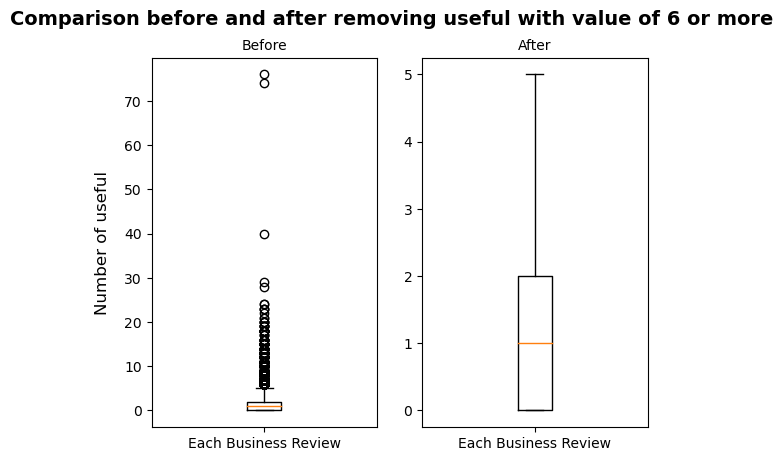

The length of the data before: 38654
The length of the data after: 33564


In [8]:
# your code and solutions

# Extract the unique value from business_categories of Q1.3
unique_categories = categories_count['business_categories'].unique()

# In sample_data, shows rows with extracted unique business_categpries
filtered_unique_categories = sample_data[sample_data['business_categories'].isin(unique_categories)].copy()

# Remove any rows where 'useful' is greater than or equal to 6
filtered_unique_categories.drop(filtered_unique_categories[filtered_unique_categories['useful'] >= 6].index, inplace = True)

# Create boxplot to compare the results
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparison before and after removing useful with value of 6 or more', size = 14, fontweight = 'bold')
ax1.boxplot(sample_data['useful'])
ax1.set_title('Before', size = 10)
ax1.set_ylabel("Number of useful", size = 12, labelpad = 10)
ax1.set_xticks([1], ['Each Business Review'])
ax2.boxplot(filtered_unique_categories['useful'])
ax2.set_title('After', size = 10)
ax2.set_xticks([1], ['Each Business Review'])
plt.show()

print("The length of the data before:", len(sample_data))
print("The length of the data after:", len(filtered_unique_categories))

Before removing outliers, the boxplot shows most of the reviews have 0 to 5 number of useful and many outliers lie above the whisker. After removing the outliers, it is more obvious that at least 75% of the business review has 0 to 2 number of useful and the median is 1.

### Q2.2 In general, we might remove some inactive users from a dataset (output from Q2.1), for example, users who rate businesses less than 3 times. However, in this case, we are doing the opposite and removing extremely active users who rate businesses more than 30 times (>30). Again, create a single figure with two subplots, one showing the boxplot of the count of business rating given by each user and the other showing the boxplot of the data with outliers removed. 

At last, __print the length of the data__.

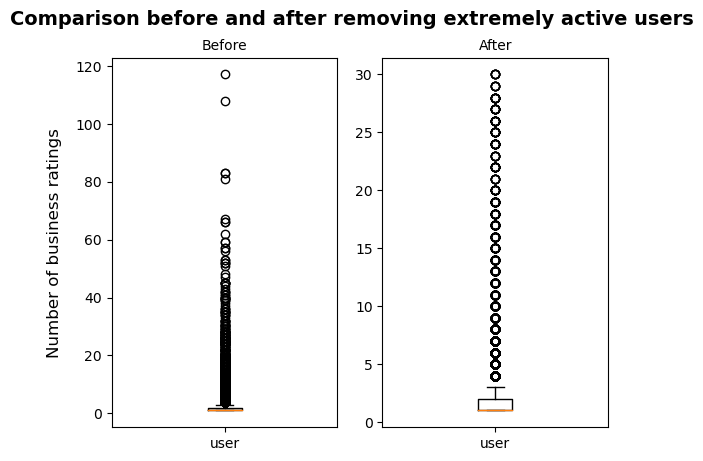

The length of the data before: 33564
The length of the data after: 30552


In [9]:
# your code and solutions

# Grouping user_id together and displays the number times each user rates businesses
user_group = filtered_unique_categories.pivot_table(index = ['user_id'], aggfunc = ['size']).reset_index()

# Remove extremely active users who rate businesses more than 30 times
user_group.drop(user_group[user_group['size'] > 30].index, inplace = True)
user_id_value = user_group['user_id'].values
filtered_sample_data = filtered_unique_categories[filtered_unique_categories['user_id'].isin(user_id_value)]

# Create dataframe of count of business ratings given by each user
original_user_ratings = pd.DataFrame(filtered_unique_categories.groupby('user_id')['stars'].count().reset_index(name = 'count'))
filtered_user_ratings = pd.DataFrame(filtered_sample_data.groupby('user_id')['stars'].count().reset_index(name = 'count'))

# Create boxplot to compare the results
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparison before and after removing extremely active users', size = 14, fontweight = 'bold')
ax1.boxplot(original_user_ratings['count'])
ax1.set_title('Before', size = 10)
ax1.set_ylabel("Number of business ratings", size = 12, labelpad = 10)
ax1.set_xticks([1], ['user'])
ax2.boxplot(filtered_user_ratings['count'])
ax2.set_title('After', size = 10)
ax2.set_xticks([1], ['user'])
plt.show()

print("The length of the data before:", len(filtered_unique_categories))
print("The length of the data after:", len(filtered_sample_data))

Before removing the users who rate more than 30 times, the outliers mostly lie between 3 to 40. After removing the users who rate more than 30 times, there are still many outliers which lie between 3 to 30. The median of user rating is 1 and at least 75% of the users have rated 1 to 2 times only.

# Q3. Training a LinearRegression model on the data output from Q2.2.

### Q3.1 How to build a linear regression model on a subset of the data, using the `useful` column as the input variable and the `stars` column as the output variable. Split the data into a training set and a test set, with 70% of the data used for training. The random_state is set to 42.

In [10]:
# your code and solutions

# Split the useful and stars column data into a training set and test set and obtain the MSE and R squared results
X = filtered_sample_data[['useful']]
y = filtered_sample_data['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
mse = ((np.array(y_test) - predicted)**2).sum()/len(y_test)
print("MSE: ", mse)
print("R squared:", r2_score(y_test, predicted))

MSE:  1.5365596214789998
R squared: 0.0066458862102731775


According to R square score, the result shows a number that is close to 0. It indicates that the independent variable 'useful' is not explaining much in the variation of the dependent variable 'stars'.

### Q3.2 Assuming that the number of reviews a business has received  `business_review_count`  can greatly influence the average rating that the business has received. Now, we create the relevant variable to the data, and do the LinearRegression again to the `stars`. 

In [11]:
# your code and solutions

# Obtain business_review_count dataframe
business_review_count = filtered_sample_data.groupby('business_id')['text'].count().reset_index(name = 'business_review_count')

# Merge the dataframe and 
business_review_count_cd = pd.merge(filtered_sample_data, business_review_count, how = "inner")

# Split the business_review_count and average rating column data into training set and test set and obtain the MSE and R squared results
X = business_review_count_cd[['business_review_count']]
y = business_review_count_cd['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
mse = ((np.array(y_test) - predicted)**2).sum()/len(y_test)
print("MSE: ", mse)
print("R squared:", r2_score(y_test, predicted))

MSE:  1.4734163922995829
R squared: 0.019746813207919933


According to R square score, the result shows a very low value. It indicates that the independent variable 'business_review_count' is not explaining much in the variation of the dependent variable 'stars'.

### Q3.3 Output the correlations between `business_review_count` and `useful` variables with `stars` and analyze the results.

In [12]:
# your code and solutions

# Correlation between business_review_count and stars
business_review_count_cd[['business_review_count', 'stars']].corr()

business_review_count     stars
business_review_count               1.000000  0.146849
stars                               0.146849  1.000000

In [13]:
# Correlation between useful and stars
business_review_count_cd[['useful', 'stars']].corr()

useful     stars
useful  1.000000 -0.073588
stars  -0.073588  1.000000

For the correlation between business_review_count and stars, it shows that there is a week positive relationship between them. The increase of any of the two data causes the other to increase slightly.

For the correlation between useful and stars, it shows that there is a very week negative relationship or nearly no relationship between them. The increase of any of the two data causes the other to decrease trivially or nothing.

# Summary

After the sample data set is extracted, further data processing and cleaning are carried out. Each business category is replaced by the last values of itself to facilitate a more general categorization. Then, business categories that appears less than 200 times are removed from the data set. The result shows only 21 unique business categories remain. And then review with 6 or more number of useful are removed. In comparison between before and after cleaning data, all the outliers are removed in respect to useful column. Furthermore, extremely active users, who rate businesses more than 30 times, are removed from the data set. In comparison between before and after cleaning data, there are still outliers remain in respect to user's number of reviews. In terms of Linear Regression Model, it can be observed that the model fit is worse between useful and stars. Useful and stars do not explain each other's variation. For business review count and stars, the model fit is slightly better but remain worse. Both of them cannot explain the variation of each other. Finally, the correlations between business review count and useful variables with stars show there is no strong relationship.

As a result, the low model fit and nearly no correlation could be explained by unpredictable human behaviour. The reviews are created by human, their behaviour is hard to predict, thus the reviews. Further investigations are required before a conclusion can be drawn.